In [22]:
import yahoo_fin.stock_info as si
from yahoo_fin.stock_info import get_analysts_info
from yahoo_fin.stock_info import get_data
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
from pandas import to_datetime
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [33]:
spy

,date,open,high,low,close,adjclose,volume,ticker
0,2018-01-02,267.839996,268.809998,267.399994,268.769989,254.112717,86655700,SPY
1,2018-01-03,268.959991,270.640015,268.959991,270.470001,255.719986,90070400,SPY
2,2018-01-04,271.200012,272.160004,270.540009,271.609985,256.797821,80636400,SPY
3,2018-01-05,272.510010,273.559998,271.950012,273.420013,258.509186,83524000,SPY
4,2018-01-08,273.309998,274.100006,272.980011,273.920013,258.981873,57319200,SPY
...,...,...,...,...,...,...,...,...
763,2021-01-13,378.690002,380.859985,377.850006,379.790009,379.790009,45303600,SPY
764,2021-01-14,380.589996,381.130005,378.100006,378.459991,378.459991,49989100,SPY
765,2021-01-15,376.720001,377.579987,373.700012,375.700012,375.700012,107046400,SPY
766,2021-01-19,378.339996,379.230011,376.750000,378.649994,378.649994,51233300,SPY


# Auto Arima

In [27]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [61]:
spy_auto = spy[['date', 'close']]
spy_auto

,date,close
0,2018-01-02,268.769989
1,2018-01-03,270.470001
2,2018-01-04,271.609985
3,2018-01-05,273.420013
4,2018-01-08,273.920013
...,...,...
763,2021-01-13,379.790009
764,2021-01-14,378.459991
765,2021-01-15,375.700012
766,2021-01-19,378.649994


In [70]:
spy_auto['date'] = pd.to_datetime(spy_auto['date'])
spy_auto.set_index('date', inplace=True)

In [71]:
adf_test = ADFTest(alpha = .05)
adf_test.should_diff(spy_auto.close)

(0.23785318250467502, True)

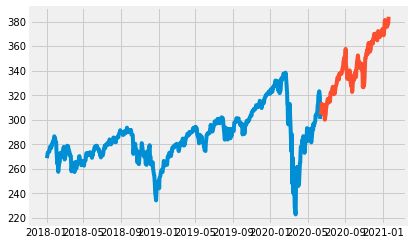

In [72]:
train = spy_auto.close[:615]
test = spy_auto.close[-153:]
plt.plot(train)
plt.plot(test)


In [73]:
spy_auto_arima = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(spy_auto_arima.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3775.264, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3641.627, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3763.002, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3551.371, Time=0.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.51 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3575.841, Time=0.39 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=3540.045, Time=0.70 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=3625.196, Time=0.30 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.43 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.33 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=3538.733, Time=0.95 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=3624.9

In [74]:
spy_auto_arima.fit(train)

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [75]:
spy_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  615
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1763.367
Date:                            Mon, 15 Feb 2021   AIC                           3538.733
Time:                                    14:30:40   BIC                           3565.135
Sample:                                         0   HQIC                          3549.009
                                            - 615                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1932      0.021     -9.277      0.000      -0.234      -0.152
ar.L2          0.1668      0.022      7.551      0.000       0.123       0.210
ar.L3          0.0755      0.024      3.102      0.002       0.028       0.123
ar.S.L12      -0.6350      0.025    -25.403      0.000      -0.684      -0.586
ar.S.L24      -0.3836      0.025    -15.329      0.000      -0.433      -0.335
sigma2        20.2720      0.587     34.551      0.000      19.122      21.422
===================================================================================
Ljung-Box (Q):                      178.32   Jarque-Bera (JB):              1090.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.52   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

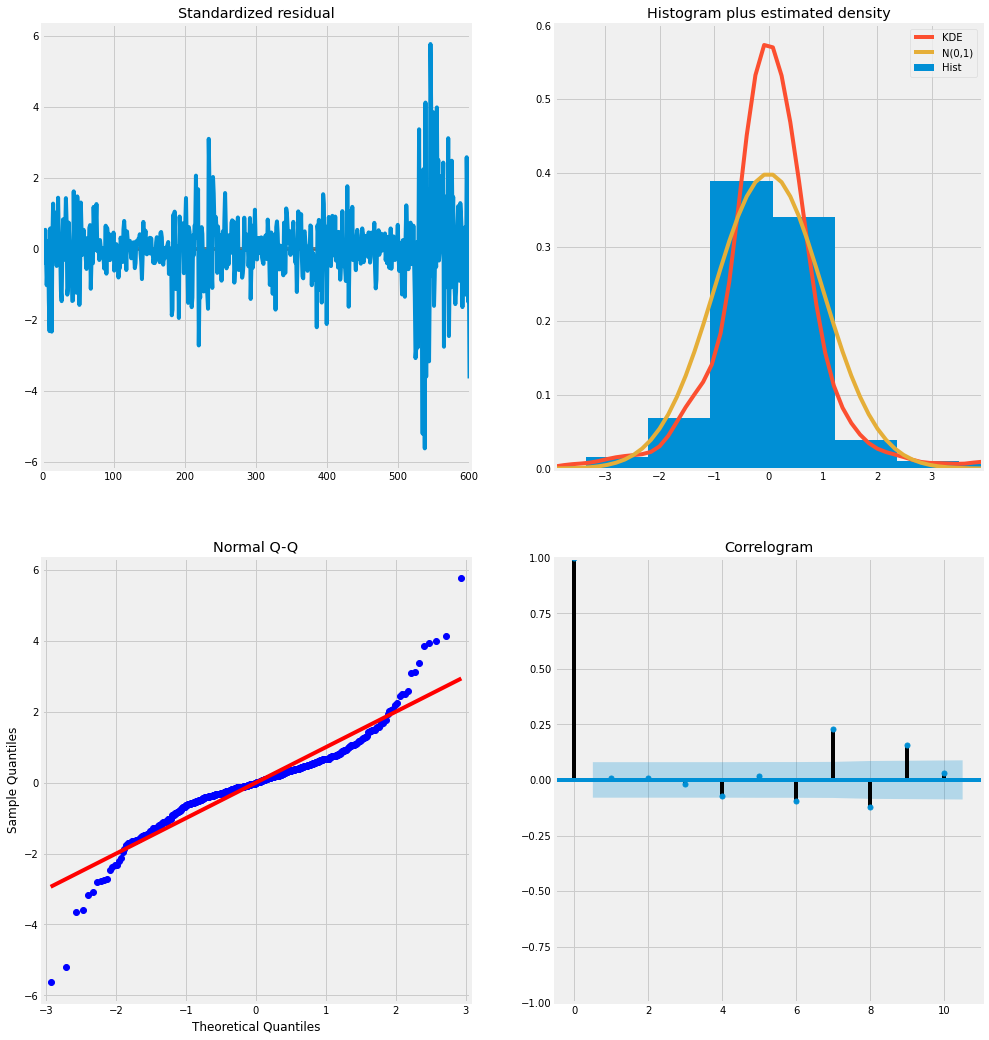

In [76]:
spy_auto_arima.plot_diagnostics(figsize=(15,18)),
plt.show()

In [80]:
prediction = pd.DataFrame(spy_auto_arima.predict(n_periods=153), index=test.index)
prediction.columns = ['Prediected Close']
prediction

,Prediected Close
date,
2020-06-12,308.776856
2020-06-15,305.143347
2020-06-16,305.524275
2020-06-17,305.945091
2020-06-18,306.988712
...,...
2021-01-13,386.083746
2021-01-14,389.940215
2021-01-15,391.728402


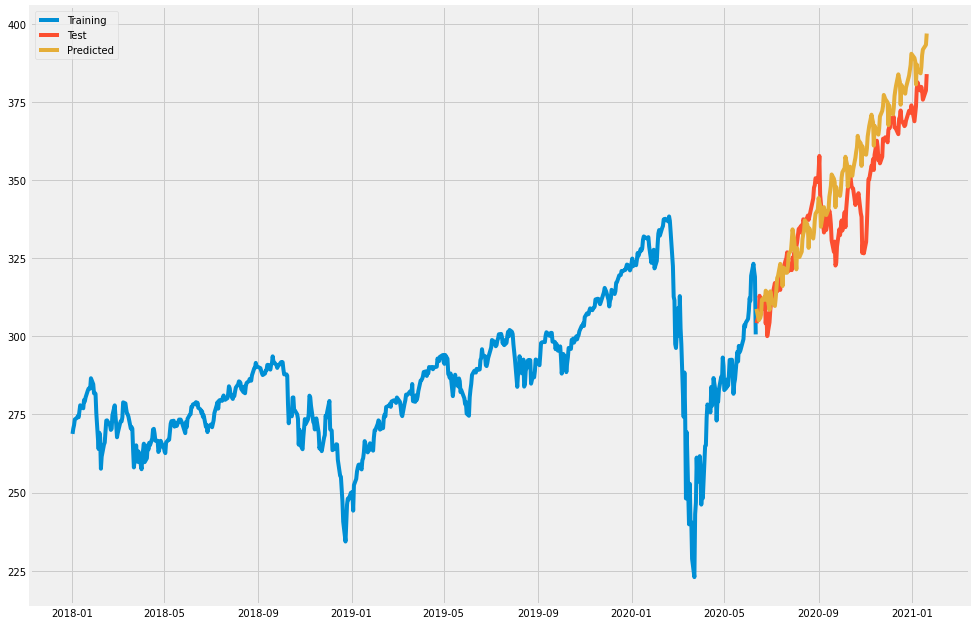

In [81]:
plt.figure(figsize=(15,11))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc = 'left corner')
plt.show()

# Facebook Prophet

In [3]:
#daily stock info for spy 
spy = get_data("spy", start_date="1/1/2018", end_date="1/21/2021",
                        index_as_date=False, interval="1d")
spy

,date,open,high,low,close,adjclose,volume,ticker
0,2018-01-02,267.839996,268.809998,267.399994,268.769989,254.112717,86655700,SPY
1,2018-01-03,268.959991,270.640015,268.959991,270.470001,255.719986,90070400,SPY
2,2018-01-04,271.200012,272.160004,270.540009,271.609985,256.797821,80636400,SPY
3,2018-01-05,272.510010,273.559998,271.950012,273.420013,258.509186,83524000,SPY
4,2018-01-08,273.309998,274.100006,272.980011,273.920013,258.981873,57319200,SPY
...,...,...,...,...,...,...,...,...
763,2021-01-13,378.690002,380.859985,377.850006,379.790009,379.790009,45303600,SPY
764,2021-01-14,380.589996,381.130005,378.100006,378.459991,378.459991,49989100,SPY
765,2021-01-15,376.720001,377.579987,373.700012,375.700012,375.700012,107046400,SPY
766,2021-01-19,378.339996,379.230011,376.750000,378.649994,378.649994,51233300,SPY


In [4]:
spy.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object')

In [5]:
spy_fp = spy[['date', 'close']]
spy_fp

,date,close
0,2018-01-02,268.769989
1,2018-01-03,270.470001
2,2018-01-04,271.609985
3,2018-01-05,273.420013
4,2018-01-08,273.920013
...,...,...
763,2021-01-13,379.790009
764,2021-01-14,378.459991
765,2021-01-15,375.700012
766,2021-01-19,378.649994


In [6]:
#Rename features
spy_fp = spy_fp.rename(columns = {'date':'ds', 'close':'y'})
spy_fp

,ds,y
0,2018-01-02,268.769989
1,2018-01-03,270.470001
2,2018-01-04,271.609985
3,2018-01-05,273.420013
4,2018-01-08,273.920013
...,...,...
763,2021-01-13,379.790009
764,2021-01-14,378.459991
765,2021-01-15,375.700012
766,2021-01-19,378.649994


In [7]:
#Modeling (95% confiddence interval)
model = Prophet(interval_width=0.95) 
# fit the model using all data
model.fit(spy_fp) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


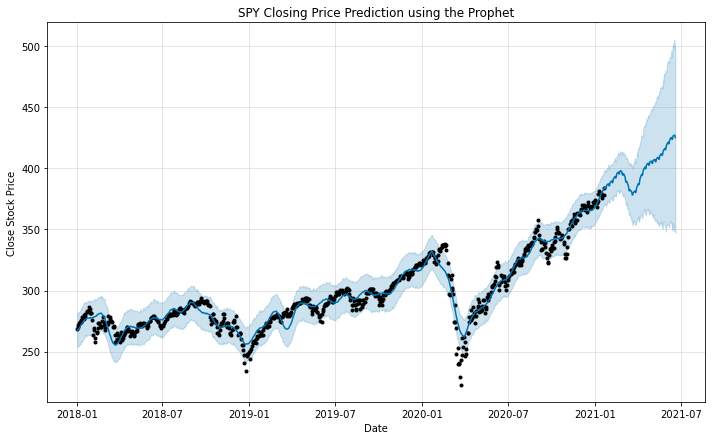

In [8]:
#we need to specify the number of days in future -- 150

future = model.make_future_dataframe(periods=150) 
prediction = model.predict(future)
model.plot(prediction)
plt.title("SPY Closing Price Prediction using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

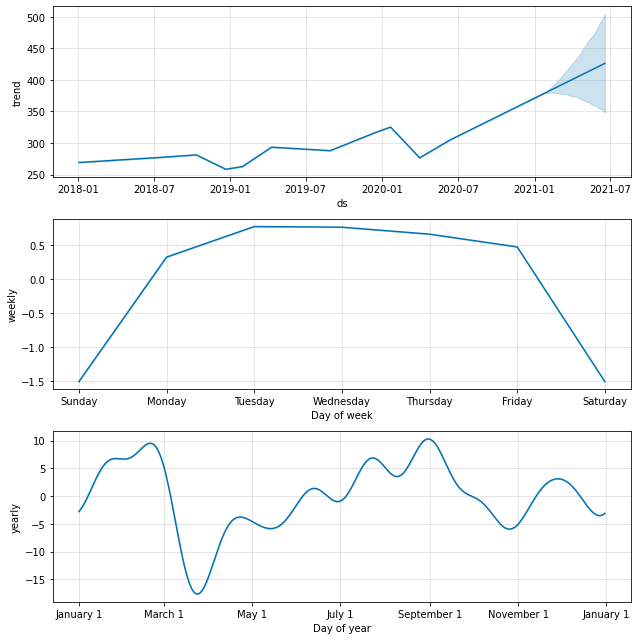

In [9]:
#analyzing components of prediction model
model.plot_components(prediction)
plt.show()

In [10]:
# Use make_future_dataframe() with daily frequency for one year
future_dates = model.make_future_dataframe(periods=365, freq='D')
future_dates

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
1128,2022-01-16
1129,2022-01-17
1130,2022-01-18
1131,2022-01-19


In [11]:
forecast = model.predict(future_dates)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,269.190499,253.096848,281.721072,269.190499,269.190499,-1.760656,-1.760656,-1.760656,0.779438,0.779438,0.779438,-2.540094,-2.540094,-2.540094,0.0,0.0,0.0,267.429843
1,2018-01-03,269.230923,254.101009,282.763187,269.230923,269.230923,-1.408215,-1.408215,-1.408215,0.770289,0.770289,0.770289,-2.178504,-2.178504,-2.178504,0.0,0.0,0.0,267.822708
2,2018-01-04,269.271347,253.799937,282.576723,269.271347,269.271347,-1.099951,-1.099951,-1.099951,0.667244,0.667244,0.667244,-1.767195,-1.767195,-1.767195,0.0,0.0,0.0,268.171397
3,2018-01-05,269.311772,254.283004,282.641102,269.311772,269.311772,-0.832842,-0.832842,-0.832842,0.478530,0.478530,0.478530,-1.311371,-1.311371,-1.311371,0.0,0.0,0.0,268.478930
4,2018-01-08,269.433045,256.759951,284.546943,269.433045,269.433045,0.587190,0.587190,0.587190,0.328243,0.328243,0.328243,0.258947,0.258947,0.258947,0.0,0.0,0.0,270.020235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2022-01-16,495.003495,226.851645,762.282740,222.977643,762.096890,3.069781,3.069781,3.069781,-1.511872,-1.511872,-1.511872,4.581653,4.581653,4.581653,0.0,0.0,0.0,498.073276
1129,2022-01-17,495.329618,227.383719,773.102140,221.520329,763.362910,5.332088,5.332088,5.332088,0.328243,0.328243,0.328243,5.003845,5.003845,5.003845,0.0,0.0,0.0,500.661706
1130,2022-01-18,495.655740,226.198494,776.532439,220.063015,764.935258,6.161291,6.161291,6.161291,0.779438,0.779438,0.779438,5.381853,5.381853,5.381853,0.0,0.0,0.0,501.817031
1131,2022-01-19,495.981862,224.210185,771.522806,218.605701,766.507606,6.483370,6.483370,6.483370,0.770289,0.770289,0.770289,5.713080,5.713080,5.713080,0.0,0.0,0.0,502.465232


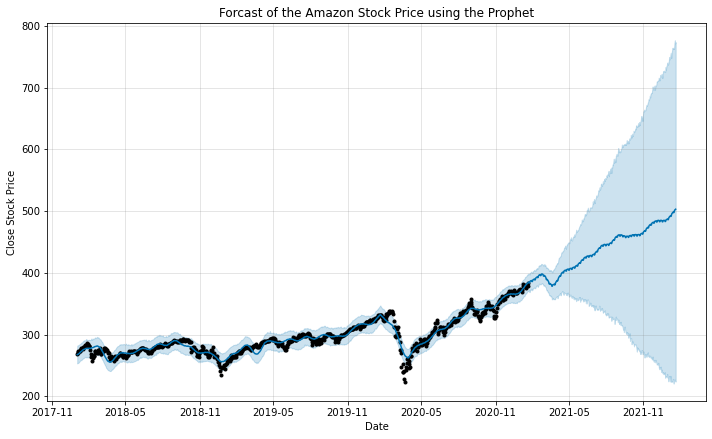

In [12]:
model.plot(forecast, uncertainty=True)
plt.title("Forcast of the Amazon Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

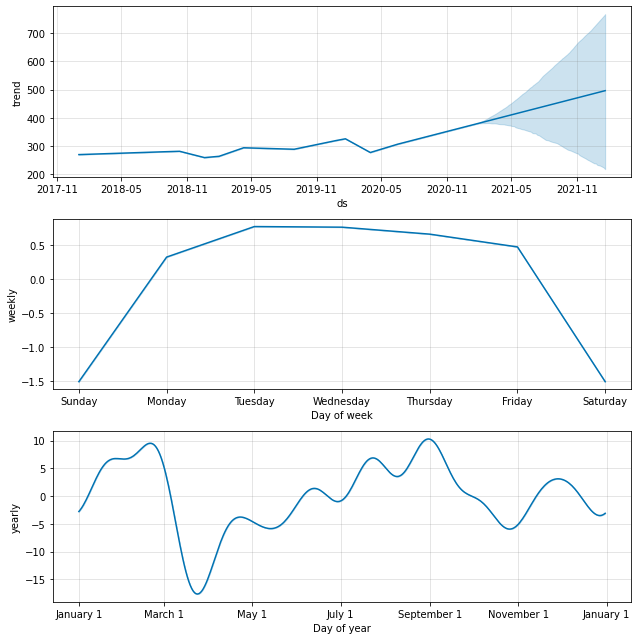

In [13]:
model.plot_components(forecast)
plt.show()